### Comparador de tiempos de ejecución

Asigna la ruta al archivo:

In [16]:
latest_p1_folder_path = "/home/monte/Documentos/GitHub/CAP/P1/"

Ejecución de los programas para medir tiempos.

In [17]:

import subprocess
import os

def compile_and_execute(source_code_path, output_path, compiler_flags):
    # Compilamos
    compile_command = ["gcc", source_code_path, "-o", output_path] + compiler_flags
    subprocess.run(compile_command)
    
    # Ejecutamos
    subprocess.run([output_path])
    
    # Leemos tiempo desde output.txt
    with open("output.txt", "r") as f:
        output = f.readline()
        time_str = output.split(":")[-1].strip().split(" ")[0]
        return float(time_str)

source_code_path = os.path.join(latest_p1_folder_path, "simple2.c")


Obtenemos varios tiempos para versión no vectorizada:

In [18]:

times_no_vec = []
for _ in range(10):
    time_no_vec = compile_and_execute(source_code_path, output_no_vec, flags_no_vec)
    times_no_vec.append(time_no_vec)
times_no_vec


[1.655142,
 1.659726,
 1.688666,
 1.677592,
 1.669244,
 1.665424,
 1.675779,
 1.700533,
 1.656812,
 1.656453]

Obtenemos varios tiempos para la versión vectorizada:

In [19]:

times_vec = []
for _ in range(10):
    time_vec = compile_and_execute(source_code_path, output_vec, flags_vec)
    times_vec.append(time_vec)
times_vec


/home/monte/Documentos/GitHub/CAP/P1/simple2.c:31:21: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:23:17: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:31:21: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:23:17: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:31:21: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:23:17: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:31:21: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:23:17: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:31:21: optimized: loop vectorized using 16 byte vectors
/home/monte/Documentos/GitHub/CAP/P1/simple2.c:23:17: optimized: loop vec

[1.675158,
 1.695144,
 1.72207,
 1.710759,
 1.699246,
 1.707547,
 1.692553,
 1.697925,
 1.685897,
 1.706168]

Vemos resultados en la gráfica:

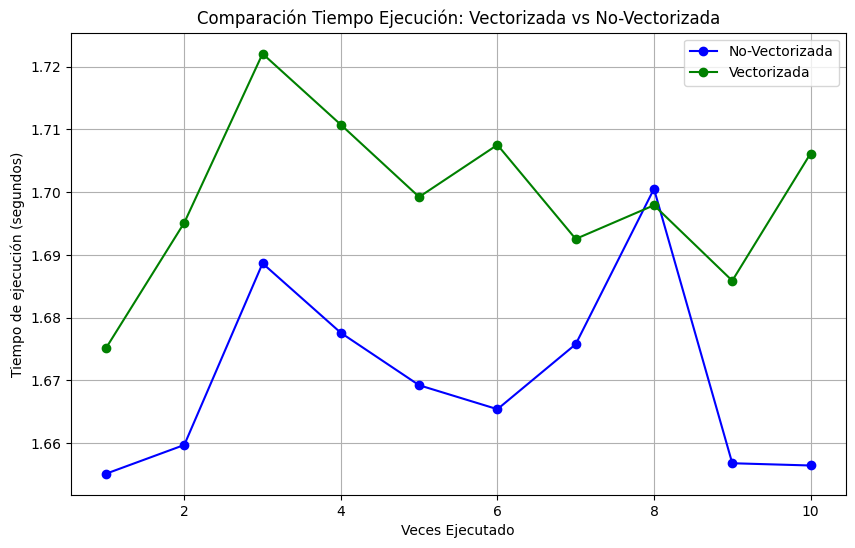

In [20]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(x, times_no_vec, label='No-Vectorizada', marker='o', color='blue')
plt.plot(x, times_vec, label='Vectorizada', marker='o', color='green')
plt.xlabel('Veces Ejecutado')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación Tiempo Ejecución: Vectorizada vs No-Vectorizada')
plt.legend()
plt.grid(True)
plt.show()


Como se puede observar con la vectorización se obtiene un mejor rendimiento general, aunque es cierto que solo son unas centésimas de segundo.